In [0]:
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.stats as ss
from collections import Counter
import math 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/normal_data_sum.csv')

df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A1A2Table1.csv')
#trafficcols = ['acc_data',	acc_time_hour	acc_time_min	highway_name	highway_km	highway_m	direction	acc_type	acc_cause	pre_door	"post_door"	sum(pre_1)	sum(pre_2)	sum(post_1)	sum(post_2)	Speed]
#catcols = ['Preferred Foot','Position','Body Type','Nationality','Weak Foot']
print(df.head())
print(df1.head())

df3= pd.merge(df,df1,on = ['日期', '時', '分', '公路', '公里', '公尺', '事故類型及型態', '主要肇事因素'],how='left')
#print(df3)
#print(df3[["acc_data" , "日期"]])

numcols = ['前車量1', '後車量1','速度','單位前車量1', '單位後車量1','時','公里','天候','光線', '道路類別','速限', '道路型態', '事故位置', '路面鋪裝','路面狀態','路面缺陷','障礙物','視距','號誌種類', '號誌動作','分向設施','分道設施-快車道間','主要肇事因素','分道設施-快慢車道間','分道設施-路面邊線']
catcols = ['車道位置']

df3= df3[numcols+catcols]
traindf = pd.concat([df3[numcols], pd.get_dummies(df3[catcols])],axis=1)
features = traindf.columns

traindf = traindf.dropna()
traindf = pd.DataFrame(traindf,columns=features)
#print(traindf)



#y = traindf['主要肇事因素'] != 0
y = (traindf['主要肇事因素'] == 7) | (traindf['主要肇事因素'] ==16) | (traindf['主要肇事因素'] ==23) 
print(y)
X = traindf.copy()
#print(X)
del X['主要肇事因素']
feature_name = list(Ｘ.columns)
# no of maximum features we need to select
num_feats=12



         日期   時   分    公路  ...      單位前車量1      單位前車量2       單位後車量1       單位後車量2
0  2015/1/1   3  40  國道一號  ...  199.565217  199.130435   289.855072   268.260870
1  2015/1/1  16  15  國道一號  ...  325.153846  302.307692   384.000000   316.384615
2  2015/1/1  14  55  國道三號  ...  725.098039  618.235294   757.254902   570.392157
3  2015/1/1  21  41  國道一號  ...  850.434783  753.913043  1359.130435  1175.869565
4  2015/1/2   0   7  國道一號  ...  111.238938   69.646018   113.982301    70.176991

[5 rows x 20 columns]
     Keyid filename   事故年月    總編號  ...         CASE_NO    單位 單位名稱  權責縣市_Keyid
0  1339188       A2  10308  20036  ...  24US1030820036  24US  NaN          23
1  1339209       A2  10308  20037  ...  24US1030820037  24US  NaN          23
2  1339230       A2  10308  20038  ...  24UW1030820038  24UW  NaN          23
3  1339251       A2  10308  20039  ...  24TV1030820039  24TV  NaN          23
4  1339272       A2  10308  20040  ...  24OV1030820040  24OV  NaN          23

[5 rows x 61 columns]


In [0]:

if (traindf['主要肇事因素'] == 21)  | (traindf['主要肇事因素'] ==22) is True:
  traindf['A']='A'
elif (traindf['主要肇事因素'] == 48)  | (traindf['主要肇事因素'] ==39) | (traindf['主要肇事因素'] ==7) is True:
  traindf['B']='B'
elif (traindf['主要肇事因素'] == 16)  | (traindf['主要肇事因素'] ==23) | (traindf['主要肇事因素'] ==26)is True: 
  traindf['D']='D'
else:
  traindf['new_colu']='others'
print(traindf['A'])

KeyError: ignored

In [0]:

traindf.to_csv('Result.csv') 

In [0]:
#Pearson correlation
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

print(cor_feature)

12 selected features
['車道位置_中線', '號誌動作', '車道位置_交流道', '事故位置', '公里', '速限', '時', '單位後車量1', '單位前車量1', '速度', '後車量1', '前車量1']


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [0]:
#chi-square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

12 selected features
['前車量1', '後車量1', '單位前車量1', '單位後車量1', '時', '公里', '分向設施', '車道位置_中線', '車道位置_交流道', '車道位置_外側', '車道位置_外側路肩', '車道位置_高架內側']


In [0]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
12 selected features
['前車量1', '後車量1', '速度', '單位前車量1', '時', '公里', '光線', '事故位置', '車道位置_交流道', '車道位置_外側', '車道位置_外側路肩', '車道位置_服務區']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
#Lasso: SelectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

print(embeded_lr_feature)

12 selected features
['前車量1', '速度', '時', '公里', '光線', '事故位置', '分道設施-快車道間', '分道設施-快慢車道間', '車道位置_中內', '車道位置_交流道', '車道位置_外側', '車道位置_外側路肩']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Tree-based: SelectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

print(embeded_rf_feature)

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

print(embeded_lgb_feature)

10 selected features
['前車量1', '後車量1', '速度', '單位前車量1', '單位後車量1', '時', '公里', '光線', '速限', '車道位置_外側']
8 selected features
['前車量1', '後車量1', '速度', '單位前車量1', '單位後車量1', '公里', '光線', '速限']


In [0]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
print(feature_selection_df.head(num_feats))

      Feature  Pearson  Chi-2    RFE  Logistics  Random Forest  LightGBM  Total
1        前車量1     True   True   True       True           True      True      6
2          公里     True   True   True       True           True      True      6
3          速度     True  False   True       True           True      True      5
4           時     True   True   True       True           True     False      5
5        後車量1     True   True   True      False           True      True      5
6      單位前車量1     True   True   True      False           True      True      5
7     車道位置_外側    False   True   True       True           True     False      4
8    車道位置_交流道     True   True   True       True          False     False      4
9      單位後車量1     True   True  False      False           True      True      4
10         光線    False  False   True       True           True      True      4
11         速限     True  False  False      False           True      True      3
12  車道位置_外側路肩    False   True   True    

In [0]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys   

In [0]:
traindf.describe()

In [0]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname="/content/SourceHanSerifK-Light.otf")
sns.set(font=myfont.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Source Han Serifk Light']})



wh1 = traindf[['前車量1', '後車量1','速度','單位前車量1', '單位後車量1','時','公里','天候','光線', '道路類別','速限', '道路型態', '事故位置', '路面鋪裝','路面狀態','路面缺陷','障礙物','視距','號誌種類', '號誌動作','分向設施','分道設施-快車道間','主要肇事因素','分道設施-快慢車道間','分道設施-路面邊線']]
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

NameError: ignored

In [0]:
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 0.64212984,  0.98500965, -3.88999829, ..., -0.58802405,
         0.15694278, -0.07188852],
       [ 0.3536659 ,  0.40461436, -1.08144204, ..., -1.24240174,
         0.15694278, -0.07188852],
       [ 0.4703602 ,  1.63217608,  0.28521654, ...,  1.30240038,
         0.15694278, -0.07188852],
       ...,
       [-1.32476892, -1.28007286,  0.3384527 , ..., -0.07906363,
         0.15694278, -0.07188852],
       [-1.24460975, -1.20970635,  0.23393193, ...,  1.73865217,
        -6.82028494, -0.07188852],
       [-1.51780528, -1.44802796,  0.20381374, ..., -0.07906363,
         0.15694278, -0.07188852]])

In [0]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

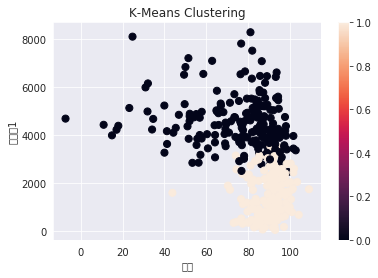

In [0]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['速度'],wh1['前車量1'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('速度')
ax.set_ylabel('前車量1')
plt.colorbar(scatter)

In [0]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

ValueError: ignored

NameError: ignored

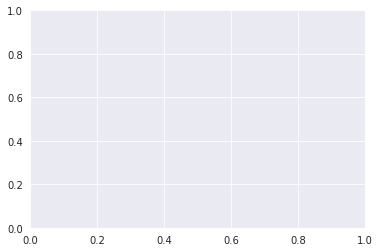

In [0]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['速度'],wh1['前車量1'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('速度')
ax.set_ylabel('前車量1')
plt.colorbar(scatter)

In [0]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})



[('上海', 285), ('杭州', 225), ('北京', 163), ('广州', 136), ('南京', 130), ('武汉', 124), ('深圳', 88), ('温州', 67), ('苏州', 66), ('宁波', 45)]